## 136. 只出现一次的数字
给定一个非空整数数组，除了某个元素只出现一次以外，其余每个元素均出现两次。找出那个只出现了一次的元素。

说明：

你的算法应该具有线性时间复杂度。 你可以不使用额外空间来实现吗？

示例 1:
```
输入: [2,2,1]
输出: 1
```
示例 2:
```
输入: [4,1,2,1,2]
输出: 4
```

- 暴力破解法 - 每次从数组中取一个数，记为cur，然后从剩下的数中查找，如果找不到，则cur即为要找的那个数。两次循环  ---  时间复杂度是 $O(n^2)$
- 排序 - 使用快排，复杂度 $O(nlogn)$
- hash表 - 时间、空间复杂度是 $O(n)$，不满足题意。


空间复杂度 $O(1)$?

除了某个元素只出现一次以外，其余每个元素均出现两次。 突破口！！！！——异或运算！

### 异或运算

异或运算有以下三个性质:

- 任何数和 00 做异或运算，结果仍然是原来的数，即 $a \oplus 0=a$
- 任何数和其自身做异或运算，结果是 $0$，即 $a \oplus a=0$。
- 异或运算满足交换律和结合律，即 $a \oplus b \oplus a=b \oplus a \oplus a=b \oplus (a \oplus a)=b \oplus0=b$

假设数组中有 $2m+1$ 个数，其中有 $m$ 个数各出现两次，一个数出现一次。令 $a_{1}$、$a_{2}$	
 、$\ldots…、a_{m}$
  为出现两次的 $ m$ 个数，$a_{m+1} $
  为出现一次的数。根据性质 3，数组中的全部元素的异或运算结果总是可以写成如下形式：

$(a_{1} \oplus a_{1}) \oplus (a_{2} \oplus a_{2}) \oplus \cdots \oplus (a_{m} \oplus a_{m}) \oplus a_{m+1}$

 

根据性质 2 和性质 1，上式可化简和计算得到如下结果：

$0 \oplus 0 \oplus \cdots \oplus 0 \oplus a_{m+1}=a_{m+1}$

因此，数组中的全部元素的异或运算结果即为数组中只出现一次的数字。





In [1]:
from typing import List
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        single = 0;
        for num in nums:
            single ^= num
        return single

In [3]:
ss = Solution()
res1 = ss.singleNumber(nums = [4,1,2,1,2])
print(res1)

4


## 137. 只出现一次的数字 II
给你一个整数数组 nums ，除某个元素仅出现 一次 外，其余每个元素都恰出现 三次 。请你找出并返回那个只出现了一次的元素。


示例 1：
```
输入：nums = [2,2,3,2]
输出：3
```
示例 2：
```
输入：nums = [0,1,0,1,0,1,99]
输出：99
``` 

提示：
```
1 <= nums.length <= 3 * 104
-231 <= nums[i] <= 231 - 1
nums 中，除某个元素仅出现 一次 外，其余每个元素都恰出现 三次
```

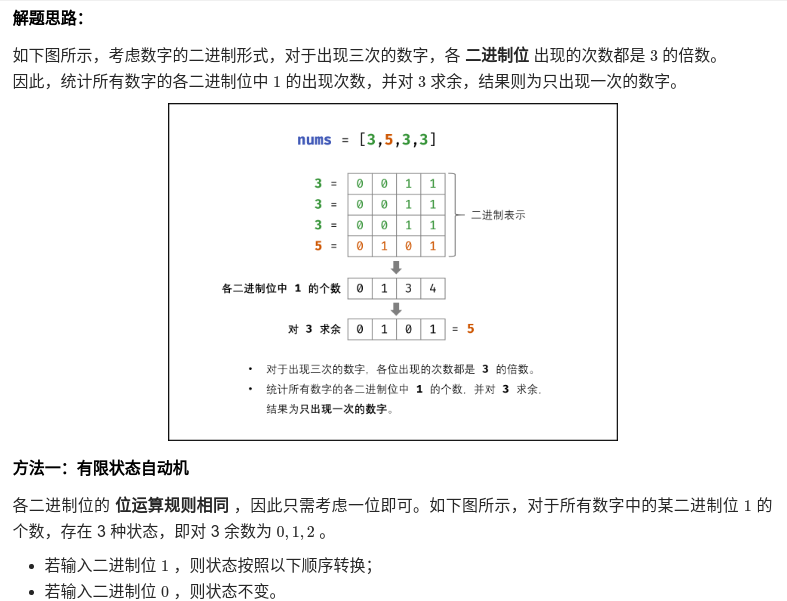
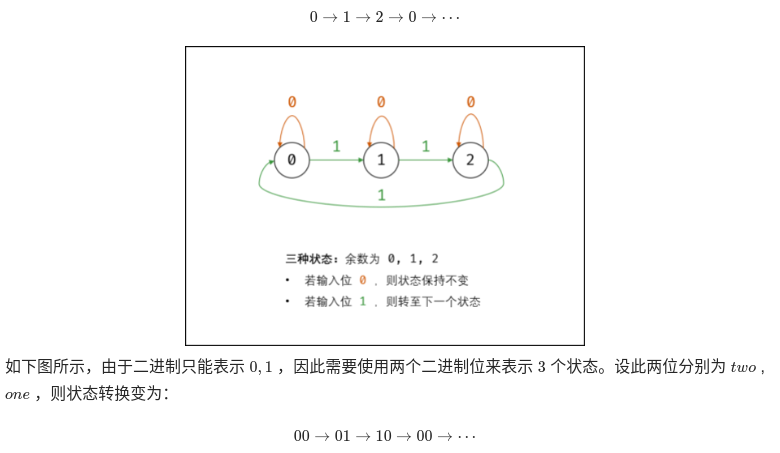
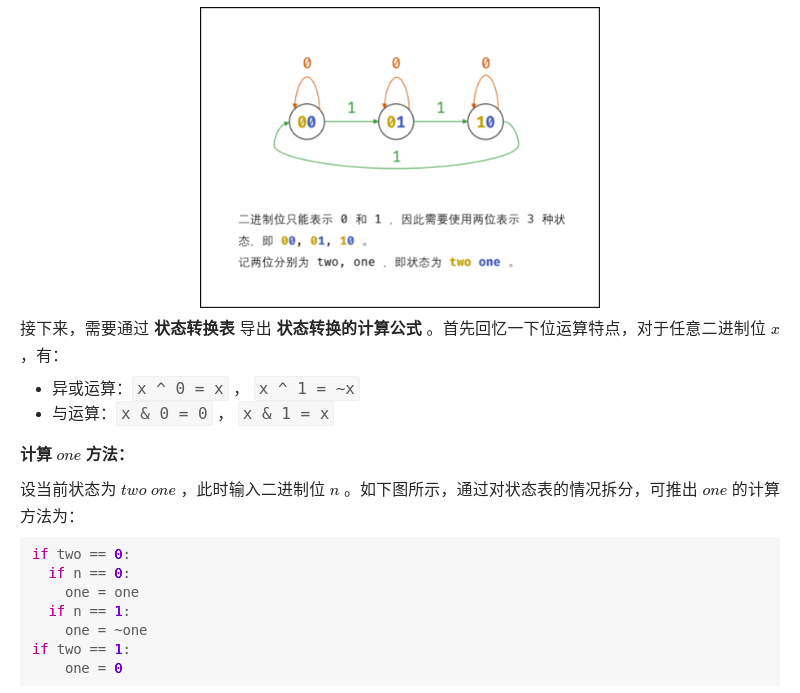
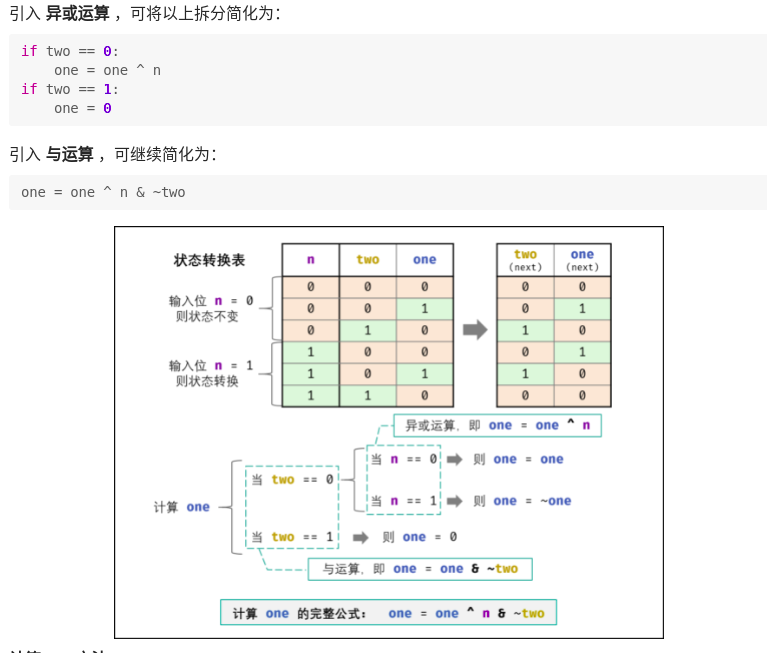
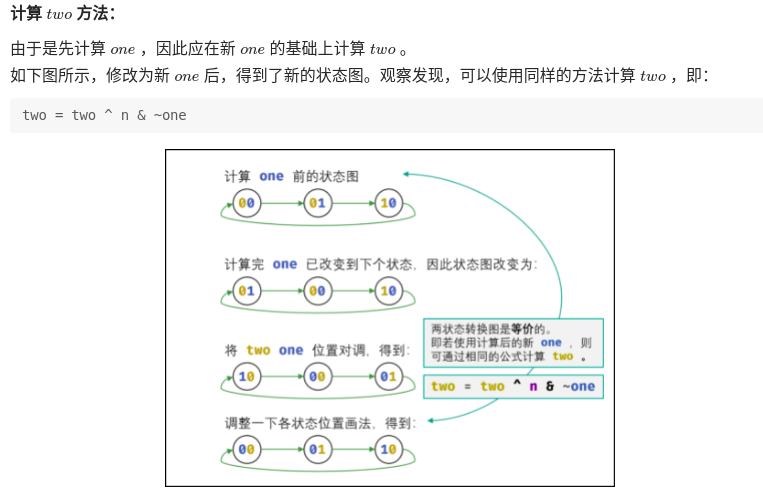
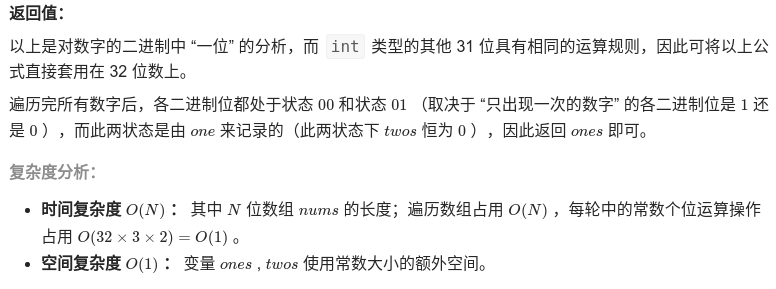

In [4]:
from typing import List

class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        ones, twos = 0, 0
        for num in nums:
            ones = ones ^ num & ~ twos
            twos = twos ^ num & ~ ones
        return ones

In [5]:
ss = Solution()
res1 = ss.singleNumber(nums = [0,1,0,1,0,1,99])
print(res1)

99


## 1486. 数组异或操作

给你两个整数，n 和 start 。

数组 nums 定义为：`nums[i] = start + 2*i`（下标从 0 开始）且 n == nums.length 。

请返回 nums 中所有元素按位异或（XOR）后得到的结果。

示例 1：
```
输入：n = 5, start = 0
输出：8
解释：数组 nums 为 [0, 2, 4, 6, 8]，其中 (0 ^ 2 ^ 4 ^ 6 ^ 8) = 8 。
     "^" 为按位异或 XOR 运算符。
```
示例 2：
```
输入：n = 4, start = 3
输出：8
解释：数组 nums 为 [3, 5, 7, 9]，其中 (3 ^ 5 ^ 7 ^ 9) = 8.
```
示例 3：
```
输入：n = 1, start = 7
输出：7
```
示例 4：
```
输入：n = 10, start = 5
输出：2
```

提示：
```
1 <= n <= 1000
0 <= start <= 1000
n == nums.length
```

In [ ]:
class Solution:
    def xorOperation(self, n: int, start: int) -> int:
        res = start
        for i in range(start + 2, start + n*2, 2):
            res ^= i
        return res

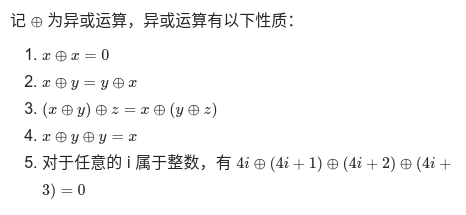


#### 目标公式推导

降到 O(1) 复杂度
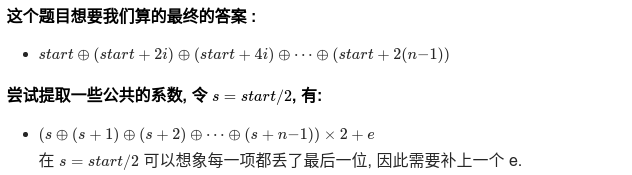
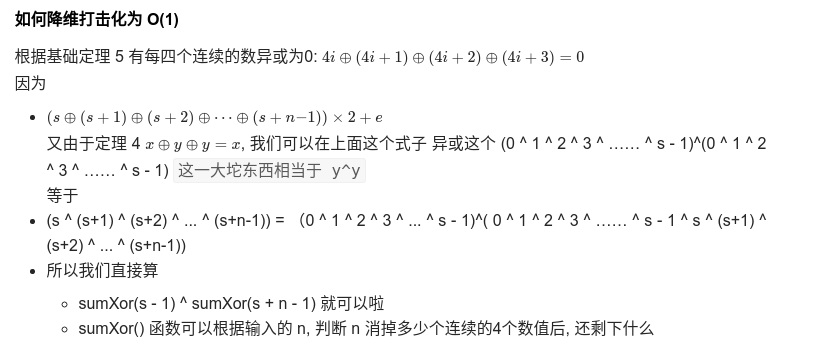
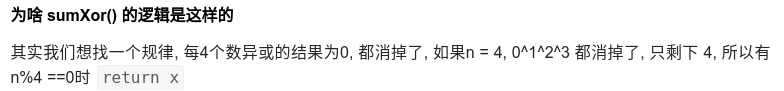
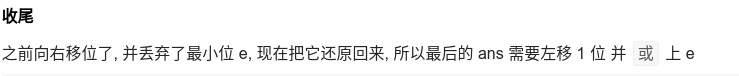
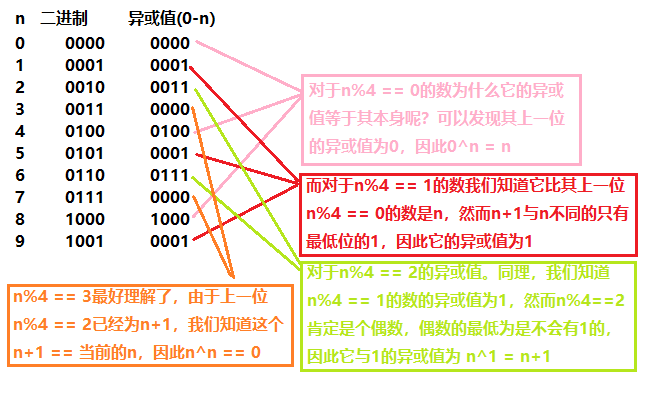

In [ ]:
class Solution:
    def xorOperation(self, n: int, start: int) -> int:
        def sumXor(x):
            ib x % 4 == 0: return x
            if x % 4 == 1: return 1
            if x % 4 == 3: return 0
            return x + 1
        e = n & start & 1
        s = start >> 1
        res = sumXor(s - 1) ^ sumXor(s + n - 1)
        return res << 1 | e

### C++ version

```cpp
class Solution {
public:
    int computeXOR(int n)
    {
        switch(n%4)
        {
            case 0: return n;
            case 1: return 1;
            case 2: return n + 1;
        }
        //case3
        return 0;
    }
    int xorOperation(int n, int start) {
        //最低为表示为b0
        int b0 = n & start & 1;
        int s = start/2;
        int res = computeXOR(s-1)^computeXOR(s+n-1);
        return (res<<1) + b0;
    }
};
```

## 1720. 解码异或后的数组
未知 整数数组 arr 由 n 个非负整数组成。

经编码后变为长度为 n - 1 的另一个整数数组 encoded ，其中 encoded[i] = arr[i] XOR arr[i + 1] 。例如，arr = [1,0,2,1] 经编码后得到 encoded = [1,2,3] 。

给你编码后的数组 encoded 和原数组 arr 的第一个元素 first（arr[0]）。

请解码返回原数组 arr 。可以证明答案存在并且是唯一的。

 

示例 1：
```
输入：encoded = [1,2,3], first = 1
输出：[1,0,2,1]
解释：若 arr = [1,0,2,1] ，那么 first = 1 且 encoded = [1 XOR 0, 0 XOR 2, 2 XOR 1] = [1,2,3]
```
示例 2：
```
输入：encoded = [6,2,7,3], first = 4
输出：[4,2,0,7,4]
```

In [ ]:
from typing import List

class Solution:
    def decode(self, encoded: List[int], first: int) -> List[int]:
        arr = [first]
        for i in encodeed:
            arr.append(arr[-1] ^ i)
        return arr

## 1723. 完成所有工作的最短时间
给你一个整数数组 jobs ，其中 jobs[i] 是完成第 i 项工作要花费的时间。

请你将这些工作分配给 k 位工人。所有工作都应该分配给工人，且每项工作只能分配给一位工人。工人的 工作时间 是完成分配给他们的所有工作花费时间的总和。请你设计一套最佳的工作分配方案，使工人的 最大工作时间 得以 最小化 。

返回分配方案中尽可能 最小 的 最大工作时间 。

 

示例 1：
```
输入：jobs = [3,2,3], k = 3
输出：3
解释：给每位工人分配一项工作，最大工作时间是 3 。
```
示例 2：
```
输入：jobs = [1,2,4,7,8], k = 2
输出：11
解释：按下述方式分配工作：
1 号工人：1、2、8（工作时间 = 1 + 2 + 8 = 11）
2 号工人：4、7（工作时间 = 4 + 7 = 11）
最大工作时间是 11 。
```

In [ ]:
class Solution:
    def minimumTimeRequired(self, jobs: List[int], k: int) -> int:
        